In [49]:
import numpy as np
import pandas as pd

# Data Preprocessing 

## Load Data

In [39]:
# Load Data
loan = pd.read_csv("loan.csv",low_memory=False)
data_dict = pd.read_excel("Data_Dictionary.xlsx")
print(loan.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None


## Check for columns with all null values and Drop columns with all null values

In [40]:
# Check if there are nulls in any columns
all_nulls = loan.isnull().all()
all_null_cols = list(all_nulls[all_nulls].index)
print("All null columns\n")
print(all_null_cols)

# Drop all columns which are completely null
print("\nDropping all null columns")
loan.drop(all_null_cols,inplace= True,axis = 1)

All null columns

['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'tot

## Check for partially null columns. Drop columns with over 30% null values.

#### Here 30% is picked as a default value and can be changed with the business or model requirements


In [41]:
any_nulls = loan.isnull().any()
any_null_cols = list(any_nulls[any_nulls].index)
print("Partially null columns\n")
print(any_null_cols)

# Checking % of nulls in partially null columns and drop all columns which have over 30 % nulls
percent_nulls = loan[any_null_cols].isnull().sum() * 100 / len(loan) 
percent_nulls_30 = list(percent_nulls[percent_nulls > 30].index)
print("\nDropping all columns with more than 30% nulls")
print(percent_nulls_30)

loan.drop(percent_nulls_30,inplace = True,axis = 1)

Partially null columns

['emp_title', 'emp_length', 'desc', 'title', 'mths_since_last_delinq', 'mths_since_last_record', 'revol_util', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'pub_rec_bankruptcies', 'tax_liens']

Dropping all columns with more than 30% nulls
['desc', 'mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d']


## Columns for Imputation

In [42]:
any_nulls = loan.isnull().any()
any_null_cols = list(any_nulls[any_nulls].index)
print("Partially null columns with less than 30 % nulls\n")
print(any_null_cols)

Partially null columns with less than 30 % nulls

['emp_title', 'emp_length', 'title', 'revol_util', 'last_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'pub_rec_bankruptcies', 'tax_liens']


## Perform Imputation and Check for irrelevent columns

In [43]:
# Imputations
loan.emp_title.fillna("Undefined",inplace= True)
loan.emp_length.fillna("Undefined",inplace= True)
loan.title.fillna("Undefined",inplace= True)
loan.pub_rec_bankruptcies.fillna("Undefined",inplace= True)
loan.last_pymnt_d.fillna("Undefined",inplace= True)
loan.last_credit_pull_d.fillna("Undefined",inplace= True)


# Strip % sign and make it float value
loan.revol_util = loan.revol_util.str.strip('%').astype("float")

# Average revolving utilization rate of 2021 was 25%. Imputing nulls with this average.
loan.revol_util.fillna(25,inplace= True)


# All values are 0 or null therefore dropping this column
loan.drop("collections_12_mths_ex_med",inplace= True, axis=1)
loan.drop("chargeoff_within_12_mths",inplace= True, axis=1)
loan.drop("tax_liens",inplace= True, axis=1)

# Check null again
any_nulls = loan.isnull().any()
any_null_cols = list(any_nulls[any_nulls].index)
print("Any null columns")
print(any_null_cols,"\n\n")
print(loan.info())


Any null columns
[] 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                39717 non-null  object 
 11  emp_length               39717 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14 

# EDA

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

## Univariate Analysis

### Target Variable : Loan Status

Fully Paid    0.83
Charged Off   0.14
Current       0.03
Name: loan_status, dtype: float64


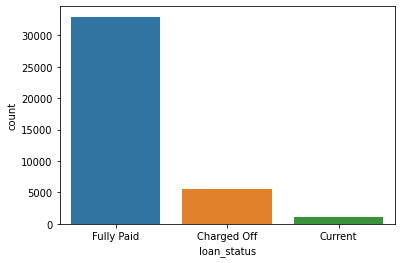

In [45]:

print(loan.loan_status.value_counts(normalize= True))

sns.countplot(x = loan["loan_status"])
plt.show()

## Loan status is imbalanced as over 80% of the data is 'Fully Paid' 

### Loan Amount

count   39,717.00
mean    11,219.44
std      7,456.67
min        500.00
25%      5,500.00
50%     10,000.00
75%     15,000.00
max     35,000.00
Name: loan_amnt, dtype: float64


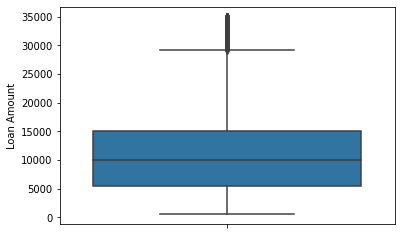

In [47]:
print(loan.loan_amnt.describe())

sns.boxplot(y = loan["loan_amnt"] )
plt.ylabel('Loan Amount')
plt.show()

### Grades and Sub-Grades


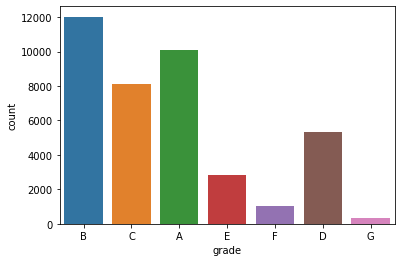

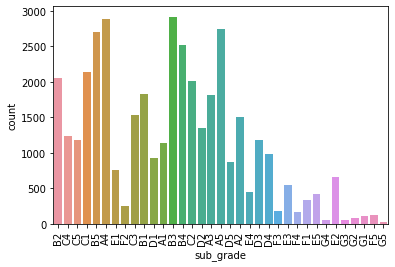

In [82]:

sns.countplot(x = 'grade', data = loan)
plt.show()


sns.countplot(x = 'sub_grade', data = loan)
plt.xticks(rotation='vertical')
plt.show()

## Segmented Univariate Analysis
### Loan Status with Employment length

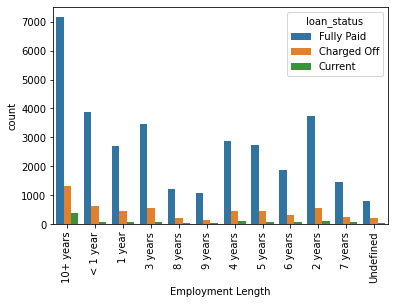

In [90]:
sns.countplot(x = 'emp_length', hue ='loan_status', data = loan)
plt.xlabel('Employment Length')
plt.xticks(rotation='vertical')
plt.show()

### Loan purpose with Loan status

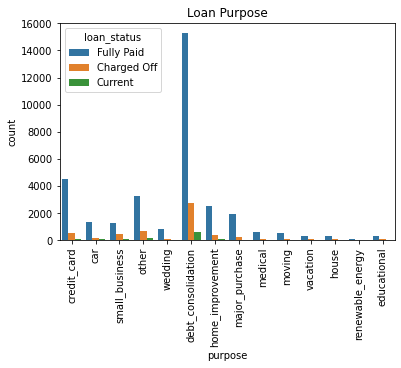

In [89]:
sns.countplot(x= 'purpose', hue = 'loan_status', data = loan)
plt.title('Loan Purpose')
plt.xticks(rotation=90)
plt.show()

## Bi-Variate Analysis

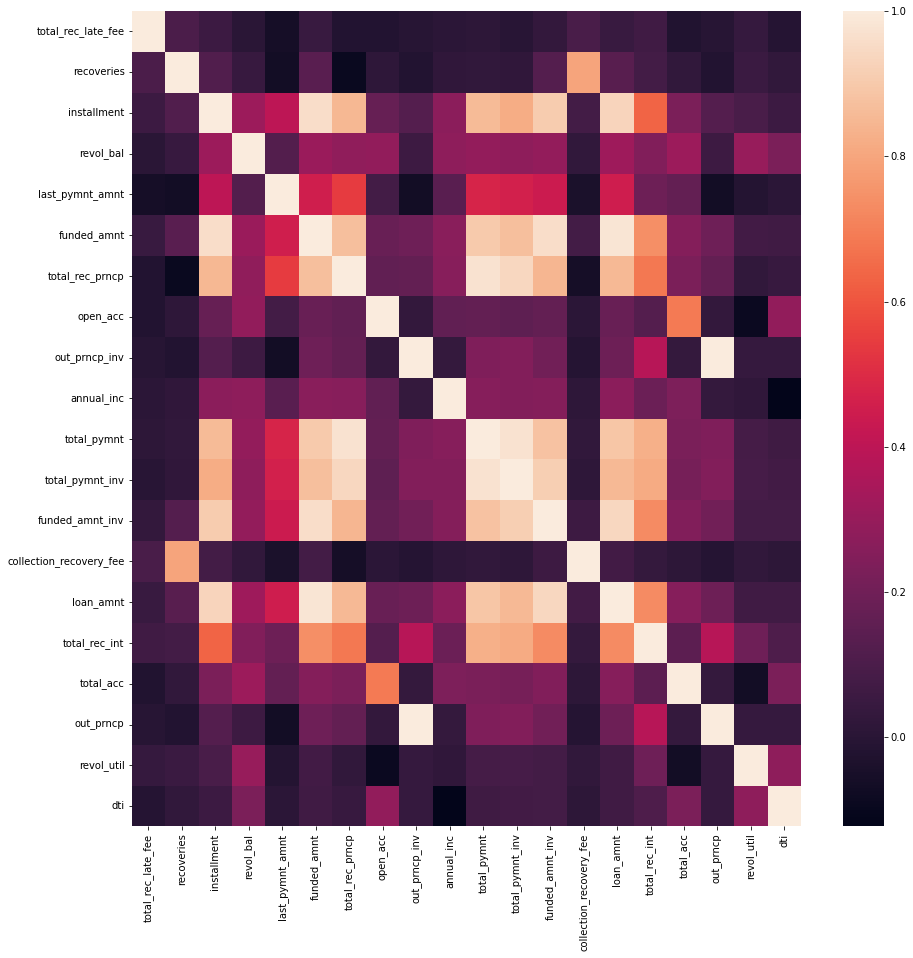

In [125]:
correlation_features =  list(set(list(loan.columns)) - {'member_id','id','delinq_amnt','acc_now_delinq',
                                                        'delinq_2yrs','inq_last_6mths','pub_rec','policy_code'})
plt.figure(figsize=(15,15))
sns.heatmap(loan[correlation_features].corr())
plt.show()